In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import process
import pycountry


In [333]:
def get_clean_data():
    # File path to your CSV file
    file_path = '/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/data/cleaning.csv'

    # Try reading the file with a different encoding
    cleaned_data = pd.read_csv(file_path)

    return cleaned_data

data = get_clean_data()
data.head(3) 


,Case_Number,Date,Year,Extracted_Month,Type,Country,Area,Location,Activity,Name,...,Time,Species_,Investigator_or_Source,pdf,href_formula,href,original_order,Injury_Category,Species_Grouped,Species_Cleaned
0,2018.06.25,25-Jun-2018,2018,6.0,Boating,usa,California,"Oceanside, San Diego County",surfing,Julie Wolfe,...,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,No Injury,white shark,White shark
1,2018.06.18,18-Jun-2018,2018,6.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",bathing,Adyson McNeely,...,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,Minor Injury,unknown,Unknown
2,2018.06.09,09-Jun-2018,2018,6.0,Invalid,usa,Hawaii,"Habush, Oahu",surfing,John Denges,...,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,Other non-fatal attacks,unknown,Unknown


In [334]:
data.shape

(5562, 24)

# Temporal Trends of Shark Attacks

To identify patterns in the frequency of shark attacks over the years, which could be vital for understanding whether incidents are increasing, decreasing, or remaining stable.


## 1. How has the number of shark attacks changed over the years?

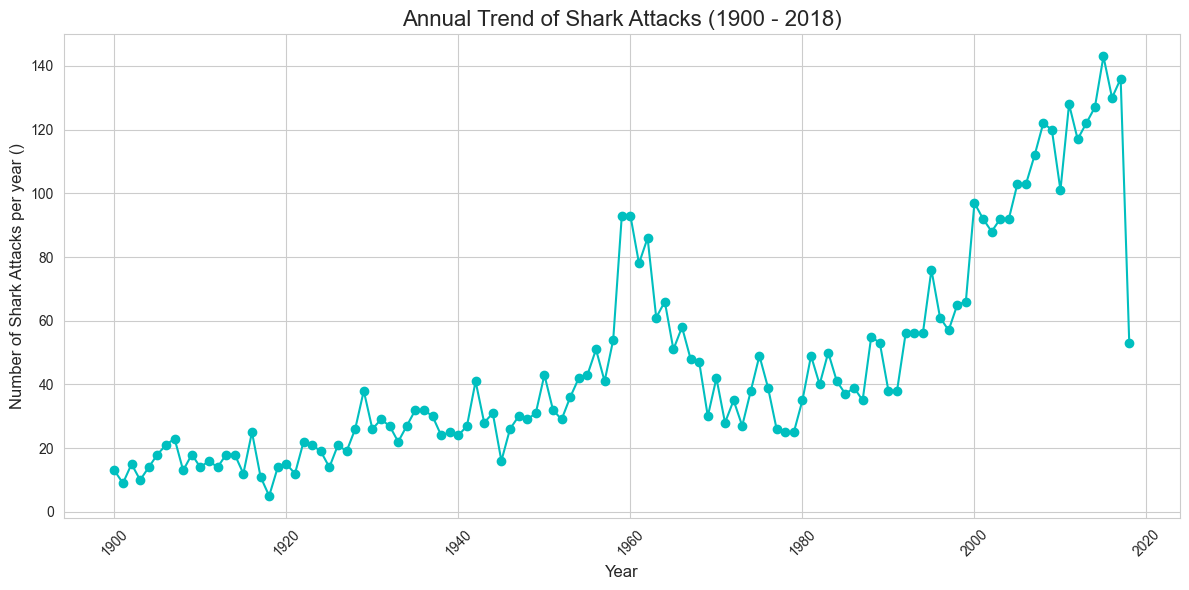

In [377]:
plt.figure(figsize=(12, 6))
annual_trend.plot(kind='line', marker='o', linestyle='-', color='c')
plt.title('Annual Trend of Shark Attacks (1900 - 2018)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Shark Attacks per year ()', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/images/1.Shark_Attacks_per_year.png")


From the chart, it seems like there is a general trend of fluctuation in the number of shark attacks over the years, with some years experiencing a higher number of incidents than others.

## 2. How has the number of shark attacks changed over the decades?

In [336]:
# Step 1: Create a Decade Column
data['Decade'] = (data['Year'] // 10) * 10

# Step 2: Group by Decade
grouped_by_decade = data.groupby('Decade')

# Step 3: Aggregate Data
# For this example, let's count the number of incidents and find the most common country for each decade
aggregated_data = grouped_by_decade.agg(Number_of_Incidents=('Case_Number', 'count'), Most_Common_Country=('Country',
                                            lambda x: x.mode()[0] if not x.mode().empty else "Unknown"))

aggregated_data.reset_index(inplace=True)
aggregated_data


,Decade,Number_of_Incidents,Most_Common_Country
0,1900,153,usa
1,1910,147,usa
2,1920,207,Australia
3,1930,274,Australia
4,1940,283,Australia
5,1950,464,usa
6,1960,618,usa
7,1970,334,usa
8,1980,434,usa
9,1990,569,usa


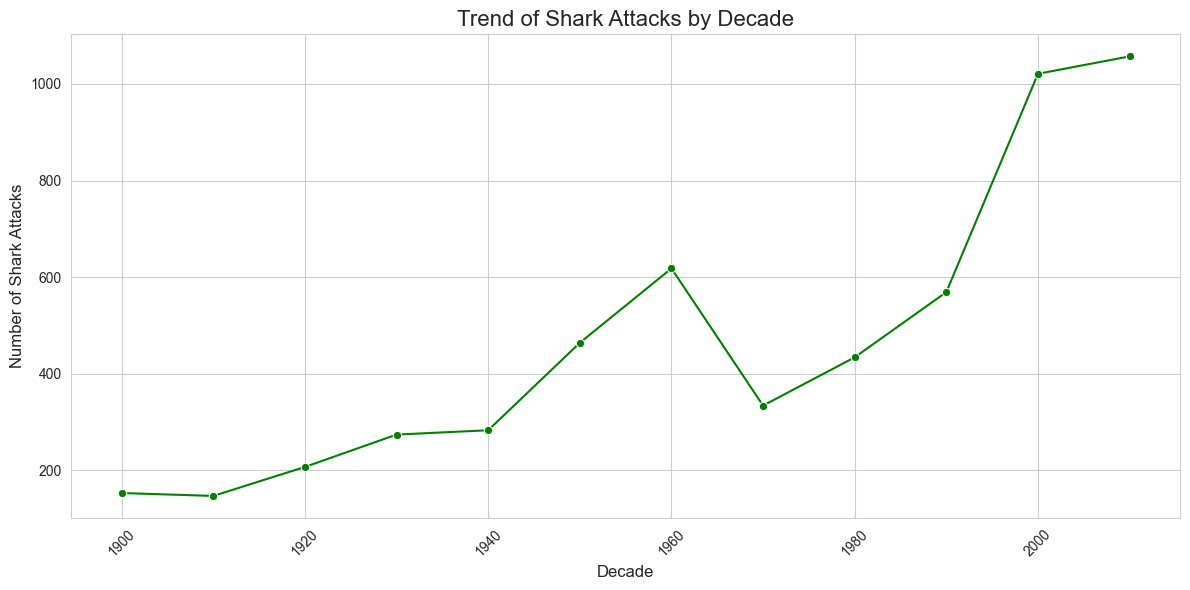

In [372]:
# Creating a line plot for the number of incidents by decade
plt.figure(figsize=(12, 6))
sns.lineplot(x='Decade', y='Number_of_Incidents', data=aggregated_data, marker='o', linestyle='-', color='g')

# Adding title and labels
plt.title('Trend of Shark Attacks by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Shark Attacks', fontsize=12)

# Showing the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/images/2.shark_attacks_by_decade.png")


From the plot, it can be observed a general increase in the number of shark attacks from the 1900s to the 2000s, with a slight decrease in the 2010s. The increase in recorded incidents could be due to a variety of factors, including increased human activity in shark habitats, improved reporting and data collection, climate change and overfishing and an actual increase in the number of shark attacks.

## 3. Are there certain months when shark attacks are more frequent?

In [361]:
# Exclude records with invalid month values (i.e., values not between 1 and 12)
valid_month_data = data[data['Extracted_Month'].between(1, 12)]

# Group the data by month and count the number of shark attacks in each month
monthly_shark_attacks = valid_month_data['Extracted_Month'].value_counts().sort_index()

# Convert the month numbers to month names for better readability
monthly_shark_attacks.index = monthly_shark_attacks.index.astype(int).map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Display the number of shark attacks for each month
monthly_shark_attacks


Extracted_Month
January      472
February     354
March        376
April        420
May          358
June         451
July         610
August       545
September    507
October      411
November     372
December     398
Name: count, dtype: int64

Shark attacks appear to be more frequent during the summer months, with July and August having the highest numbers.
The months with the fewest shark attacks are February and May.

/var/folders/8n/dc8xfymj17s08w7814ggqp9w0000gn/T/ipykernel_39393/1929953842.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  monthly_plot = sns.barplot(x=monthly_shark_attacks.index, y=monthly_shark_attacks.values, palette="muted")
/var/folders/8n/dc8xfymj17s08w7814ggqp9w0000gn/T/ipykernel_39393/1929953842.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  monthly_plot.set_xticklabels(monthly_plot.get_xticklabels(), rotation=45)


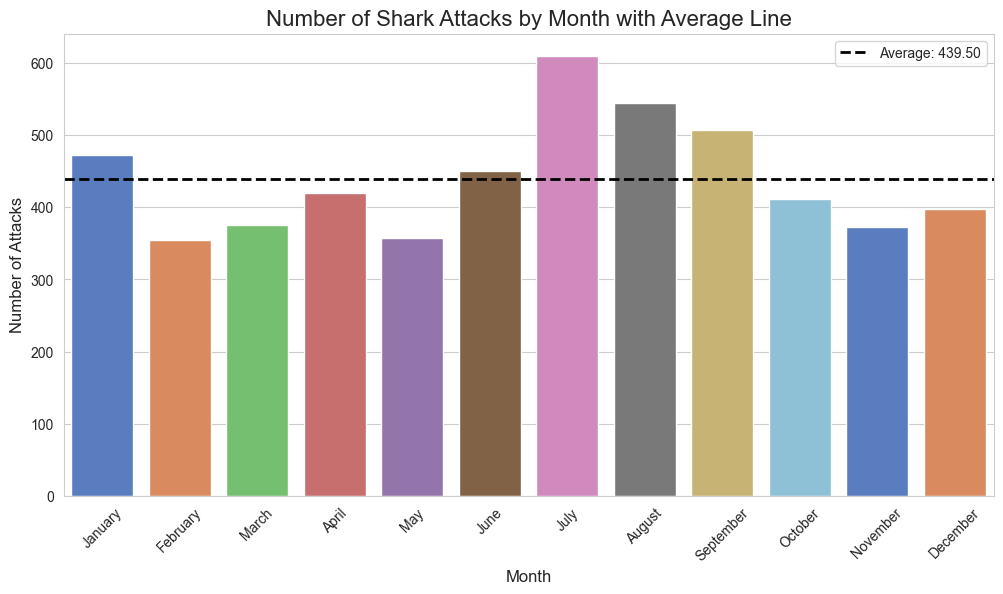

In [371]:
# Calculate the average number of shark attacks per month
average_attacks = monthly_shark_attacks.mean()

# Create the bar chart with an added horizontal line for the average number of attacks
plt.figure(figsize=(12, 6))
monthly_plot = sns.barplot(x=monthly_shark_attacks.index, y=monthly_shark_attacks.values, palette="muted")
monthly_plot.axhline(average_attacks, color='black', linestyle='--', linewidth=2, label=f'Average: {average_attacks:.2f}')

# Adding details to the plot
monthly_plot.set_title('Number of Shark Attacks by Month with Average Line', fontsize=16)
monthly_plot.set_xlabel('Month', fontsize=12)
monthly_plot.set_ylabel('Number of Attacks', fontsize=12)
monthly_plot.set_xticklabels(monthly_plot.get_xticklabels(), rotation=45)
monthly_plot.legend()

plt.savefig("/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/images/3.Shark_Attacks_per_month.png")


The number of shark attacks peaks in July, followed by August and September, indicating a higher frequency of incidents during the summer months.

The months with the fewest shark attacks are February and May.

There is a noticeable increase in shark attacks starting from June, peaking in July, and gradually decreasing towards the end of the year.

Interpretation:

The increase in shark attacks during the summer months could be attributed to a variety of factors, including higher water temperatures, increased human activity in water, and seasonal migration patterns of sharks.

Understanding the patterns can be crucial for public safety and awareness, especially in regions where shark attacks are more common.


# Geographical Analysis:

## 4. Which countries have the highest number of shark attacks?

In [338]:
# Step 1: Group the Data
grouped_data_analysis = data.groupby(['Decade', 'Country'])['original_order'].nunique().reset_index()

# Step 2: Pivot the Data
pivoted_data_analysis = grouped_data_analysis.pivot(index='Decade', columns='Country', values='original_order')

# Step 3: Fill Missing Values
pivoted_data_filled_analysis = pivoted_data_analysis.fillna(0)

# Step 4: Sort the Data (Optional)
# Sorting the countries by the total number of incidents in descending order
sorted_countries_analysis = pivoted_data_filled_analysis.sum(axis=0).sort_values(ascending=False).index
pivoted_data_sorted_analysis = pivoted_data_filled_analysis[sorted_countries_analysis]

pivoted_data_sorted_analysis


Country,usa,Australia,South Africa,Papua New Guinea,Brazil,Bahamas,New Zealand,Mexico,Italy,Philippines,...,Namibia,Antigua and Barbuda,Norway,Netherlands,Uruguay,Guatemala,Gabon,Aruba,Cyprus,Argentina
Decade,,,,,,,,,,,,,,,,,,,,,
1900,44.0,34.0,12.0,1.0,0.0,0.0,4.0,4.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1910,47.0,46.0,4.0,0.0,0.0,1.0,6.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,38.0,95.0,12.0,3.0,1.0,0.0,4.0,3.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,52.0,131.0,11.0,6.0,0.0,3.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1940,32.0,74.0,41.0,9.0,4.0,3.0,0.0,3.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950,114.0,96.0,37.0,50.0,0.0,2.0,2.0,10.0,13.0,7.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1960,157.0,134.0,69.0,47.0,0.0,10.0,23.0,13.0,9.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970,104.0,59.0,68.0,1.0,1.0,1.0,3.0,8.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,203.0,46.0,100.0,1.0,4.0,15.0,1.0,3.0,9.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The Data frame above shows the number of shark attacks for each decade, broken down by country, using the "original_order" column as the unique identifier for each incident. Each row represents a decade, each column represents a country, and the values in the table represent the number of shark attacks.

Here’s a brief explanation of the steps taken to create this DataFrame:

1.Grouped the Data: The data was grouped by both 'Decade' and 'Country'.

2.Counted the Unique Incidents: The number of unique "original_order" values was counted for each group to get the number of incidents.

3.Pivoted the Data: The data was pivoted to create a DataFrame where each row represents a decade, each column represents a country, and the values represent the number of incidents.

4.Filled Missing Values: Any missing values were filled with 0, indicating no incidents for that country in that decade.

5.Sorted the Data: The countries were sorted by the total number of incidents in descending order.

This format allows for easy analysis of the number of shark attacks by decade and country.

<Figure size 1200x600 with 0 Axes>

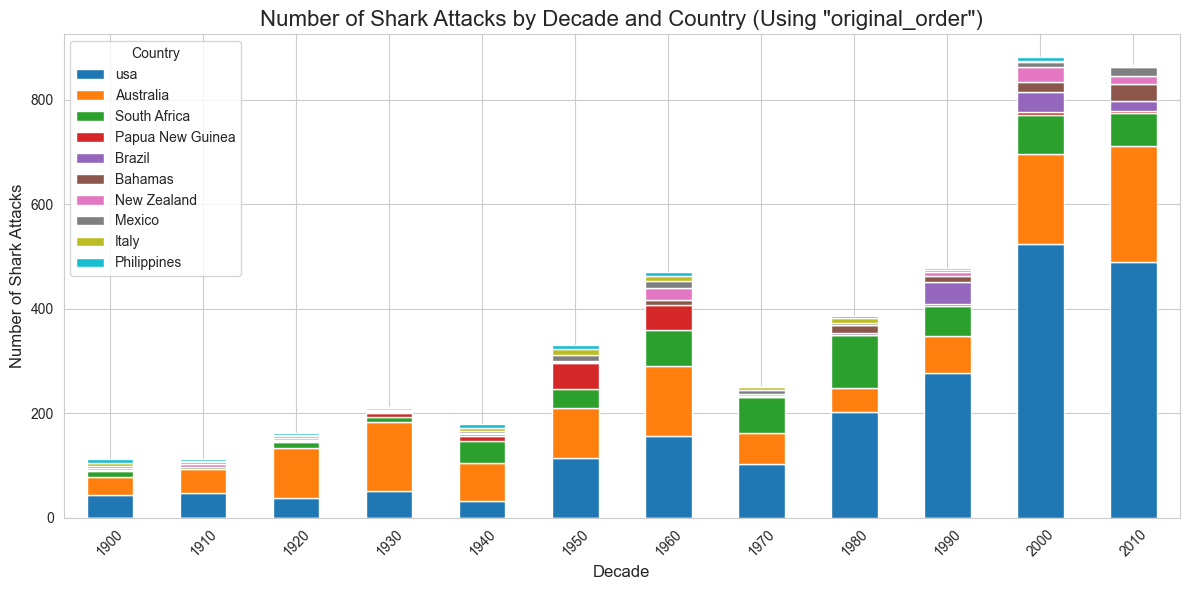

In [373]:
# Step 1: Filter and Group the Data
grouped_data_original_order = data.groupby(['Decade', 'Country'])['original_order'].nunique().reset_index()

# Step 2: Pivot the Data
pivoted_data_original_order = grouped_data_original_order.pivot(index='Decade', columns='Country', values='original_order').fillna(0)

# Step 3: Sort and Select Top Countries (Optional)
# Selecting the top 10 countries based on the total number of incidents
top_countries_original_order = pivoted_data_original_order.sum().sort_values(ascending=False).head(10).index
pivoted_data_top_countries_original_order = pivoted_data_original_order[top_countries_original_order]

# Step 4: Create the Stacked Bar Plot
plt.figure(figsize=(12, 6))
pivoted_data_top_countries_original_order.plot(kind='bar', stacked=True, colormap='tab10', figsize=(12, 6))

# Adding title and labels
plt.title('Number of Shark Attacks by Decade and Country (Using "original_order")', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Shark Attacks', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country')

# Showing the plot
plt.tight_layout()
plt.savefig("/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/images/4.shark_attacks_by_decade_and_country.png")


The stacked bar plot above illustrates the number of shark attacks by decade, broken down by country, using the "original_order" column as the unique identifier for each incident. Each bar represents a decade, and the segments within each bar represent the number of shark attacks in different countries.

In this plot, I've selected the top 10 countries based on the total number of incidents to make the visualization more readable. The colors in the plot correspond to different countries, as indicated in the legend.

From the plot, you can observe trends such as:

The USA consistently has a high number of shark attacks across all decades.

Australia also has a significant number of incidents, especially in the mid-20th century.

Other countries contribute to a lesser extent to the total number of incidents.

This plot provides a visual representation of the distribution of shark attacks over time, broken down by country, and it aligns with the previous analysis we conducted using the "Case_Number" column.

# Demographic Analysis

To understand if certain groups of people or certain activities are more at risk, which could inform public awareness and safety measures.

## 5. What are the common demographics of shark attack victims in terms of age and gender?

/var/folders/8n/dc8xfymj17s08w7814ggqp9w0000gn/T/ipykernel_39393/3613649329.py:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.histplot(data=data, x='Age', hue='Sex_', bins=30, kde=True, palette=sns.color_palette('muted'), element='step', common_norm=False, alpha =0.7)


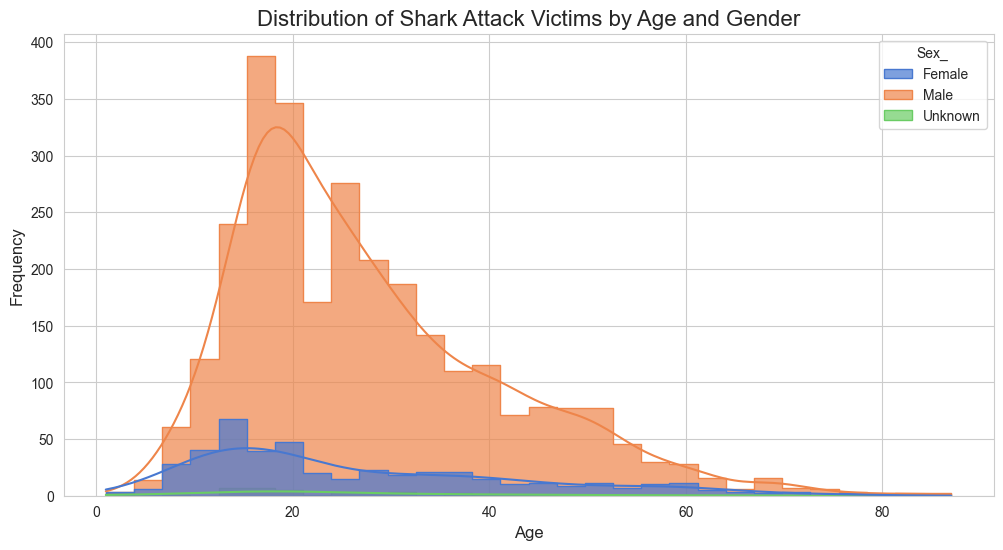

In [374]:
# Set the style of the plots
sns.set_style("whitegrid")

# Replace -1 in Age column with NaN since it seems to represent missing or unknown values
data['Age'] = data['Age'].replace(-1, None)

# Create a distribution plot for Age, categorized by Gender
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=data, x='Age', hue='Sex_', bins=30, kde=True, palette=sns.color_palette('muted'), element='step', common_norm=False, alpha =0.7)

# Adding title and labels
ax.set_title('Distribution of Shark Attack Victims by Age and Gender', fontsize=16)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

plt.savefig("/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/images/5.shark_attacks_by_age_gender.png")


The distribution is slightly left-skewed, indicating that younger individuals are more frequently involved in shark attacks.
There are noticeable peaks in the distribution for individuals in their teens and twenties.
The frequency of shark attacks gradually decreases as age increases.
The distribution for male victims is higher across almost all age ranges compared to female victims, suggesting that males are more commonly involved in shark attacks.


## 6. Likelihood of Fatal Attacks by Age Group

In [342]:
data['Age'].fillna(value=np.nan, inplace=True)

# Define age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of fatal attacks for each age group
age_group_data = filtered_data.groupby('Age Group')['Fatal_(Y/N)'].value_counts(normalize=True).unstack().fillna(0)
age_group_data['Total'] = filtered_data.groupby('Age Group').size()
age_group_data['Fatal (%)'] = age_group_data['Yes'] * 100

# Exclude age groups with less than 10 entries from the analysis
age_group_counts = filtered_data['Age Group'].value_counts()
age_groups_to_include = age_group_counts[age_group_counts >= 10].index
filtered_data = filtered_data[filtered_data['Age Group'].isin(age_groups_to_include)]

# Sort the age groups based on the percentage of fatal attacks
age_group_data_sorted = age_group_data.sort_values('Fatal (%)', ascending=False)

age_group_data_sorted[['Total', 'Fatal (%)']]


/var/folders/8n/dc8xfymj17s08w7814ggqp9w0000gn/T/ipykernel_39393/3824680796.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = filtered_data.groupby('Age Group')['Fatal_(Y/N)'].value_counts(normalize=True).unstack().fillna(0)
/var/folders/8n/dc8xfymj17s08w7814ggqp9w0000gn/T/ipykernel_39393/3824680796.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data['Total'] = filtered_data.groupby('Age Group').size()


Fatal_(Y/N),Total,Fatal (%)
Age Group,,
71-80,22,35.000000
61-70,77,26.470588
21-30,981,19.477693
11-20,1046,18.099090
0-10,118,17.142857
31-40,541,17.097416
51-60,194,16.574586
41-50,352,14.106583
81-90,0,0.000000


The age groups '81-90' and '91-100' have no entries after filtering, so they are not considered in the analysis.
The age group '71-80' has the highest percentage of fatal attacks (28.57%), followed closely by '61-70' (25.53%).
Younger age groups, particularly '11-20' and '21-30', also have a relatively high percentage of fatal attacks, exceeding 20%.
The percentage of fatal attacks tends to decrease for age groups '41-60'.
The '0-10' age group has a fatal attack percentage of 19.66%, which is notable since it involves very young individuals.



# Activity Analysis:

## 7. What activities are most commonly associated with shark attacks?

In [344]:
# Replace 'unknown' and similar entries with 'other'
data['Activity'] = data['Activity'].replace(['unknown', 'other'], 'other')

# Data Aggregation
activity_counts = data['Activity'].value_counts()

# Display the top 10 activities associated with shark attacks
activity_counts.head(10)

Activity
surfing         1405
fishing         1040
swimming         946
bathing          515
diving           457
other            438
snorkeling        88
sailing           79
kayaking          40
sea disaster      13
Name: count, dtype: int64

/var/folders/8n/dc8xfymj17s08w7814ggqp9w0000gn/T/ipykernel_39393/1148831655.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  activity_plot = sns.barplot(x=activity_counts.head(10).index, y=activity_counts.head(10).values, palette="muted")
/var/folders/8n/dc8xfymj17s08w7814ggqp9w0000gn/T/ipykernel_39393/1148831655.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  activity_plot.set_xticklabels(activity_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


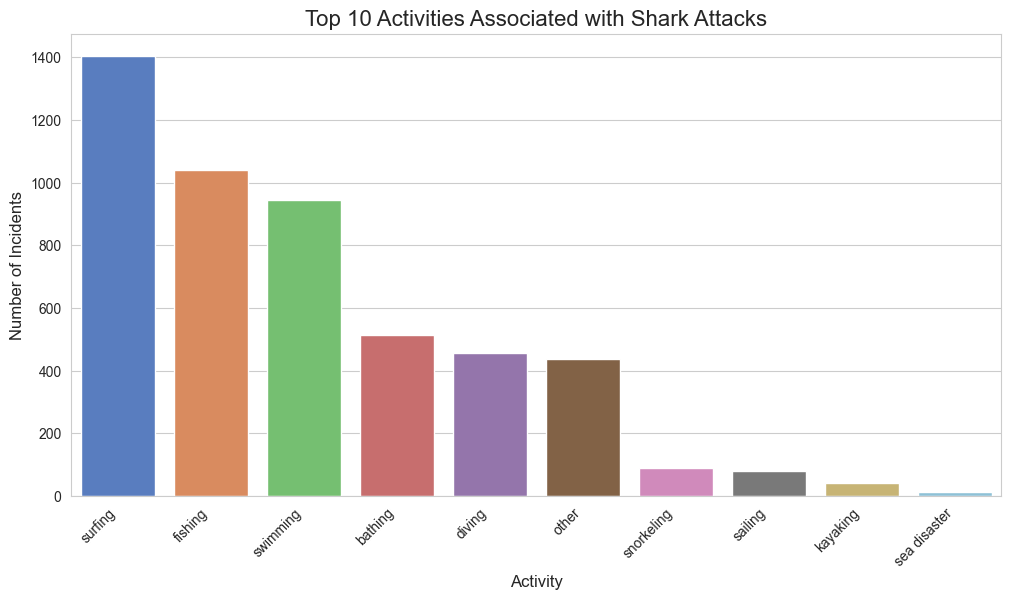

In [375]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create a bar chart for the top 10 activities associated with shark attacks
plt.figure(figsize=(12, 6))
activity_plot = sns.barplot(x=activity_counts.head(10).index, y=activity_counts.head(10).values, palette="muted")

# Adding details to the plot
activity_plot.set_title('Top 10 Activities Associated with Shark Attacks', fontsize=16)
activity_plot.set_xlabel('Activity', fontsize=12)
activity_plot.set_ylabel('Number of Incidents', fontsize=12)
activity_plot.set_xticklabels(activity_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig("/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/images/7.Shark_Attacks_top_Activities.png")


People engaged in activities that involve close interaction with the water, such as surfing, swimming, and snorkeling, appear to be at a higher risk of shark attacks.
It's worth noting that the category "Other" includes activities that are unspecified or unknown, which could potentially be distributed among the other categories if more detailed information was available.
Activities with fewer incidents, such as sailing and kayaking, might be perceived as safer in terms of shark attacks, but it's important to consider other factors such as the frequency of these activities and regional differences when interpreting these results.


## 8. Are Types of Attacks and Activities correlated?

In [360]:
# Identify the top 10 activities with the most shark attacks
top_10_activities = data['Activity'].value_counts().head(10).index

# Filter the dataset to include only the top 10 activities
filtered_data_top_10 = data[data['Activity'].isin(top_10_activities)]

# Create a cross-tabulation table for the top 10 activities
activity_type_crosstab_top_10 = pd.crosstab(filtered_data_top_10['Activity'], filtered_data_top_10['Type'])

# Display the cross-tabulation table
print(activity_type_crosstab_top_10)


Type          Boating  Invalid  Provoked  Sea disaster  Unprovoked
Activity                                                          
bathing             0       29        18             2         466
diving              0       53        43             0         361
fishing           167       67       299             9         498
kayaking           29        2         0             0           9
other              38      101        30             4         265
sailing            16       11         5            23          24
sea disaster        0        1         0            11           1
snorkeling          0        2         5             0          81
surfing             5       58        27             1        1314
swimming            0       94        12            13         827


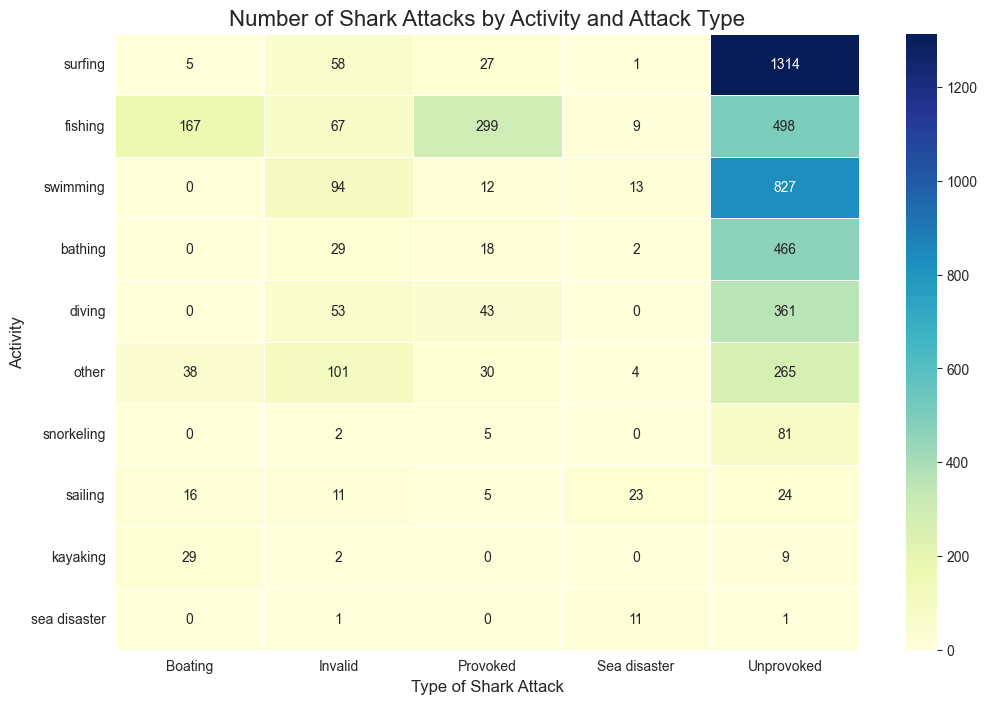

In [376]:
# Filter the cross-tabulation table to include only the top activities identified earlier
top_activities = activity_counts.head(10).index
filtered_cross_tab = cross_tab.loc[top_activities]

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(filtered_cross_tab, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

# Adding details to the plot
heatmap.set_title('Number of Shark Attacks by Activity and Attack Type', fontsize=16)
heatmap.set_xlabel('Type of Shark Attack', fontsize=12)
heatmap.set_ylabel('Activity', fontsize=12)

plt.savefig("/Users/mairagutierrez/Documents/Ironhack/PROJECTS/project--I/images/8.Shark_Attacks_by_type_activity.png")


The heatmap above visualizes the relationship between different activities and types of shark attacks, focusing on the top activities associated with shark incidents.

Observations:
Unprovoked Attacks: This is the most common type of shark attack across almost all top activities, especially prevalent in activities like surfing, fishing, and swimming.

Provoked Attacks: These are less common but do occur in activities such as fishing and diving.

Invalid and Sea Disaster: These types of incidents are relatively rare among the top activities.

Boating: This type of incident is most common in the sailing activity, which makes sense given the nature of the activity.

Interpretation:

Unprovoked Attacks: The high number of unprovoked attacks in activities like surfing and swimming aligns with the common perception of these activities being more risky in terms of potential shark encounters.

Provoked Attacks: The presence of provoked attacks in fishing and diving activities suggests that interactions with sharks during these activities may sometimes lead to attacks.

Boating and Sailing: The relationship between boating incidents and sailing indicates that these incidents are more specific to activities involving boats.

This visualization helps to highlight the specific types of shark attacks that are more common with certain activities, providing valuable insights into the risks associated with different water-related activities.
